# # Step 1. Import Dependencies


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data into a dataframe

df = pd.read_csv('C:\\Users\\HP\\ML_Projects\\2.K-means Clustering\\Data\\Mall_Customers.csv', index_col=0, header=0)
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


## Step 3 EDA

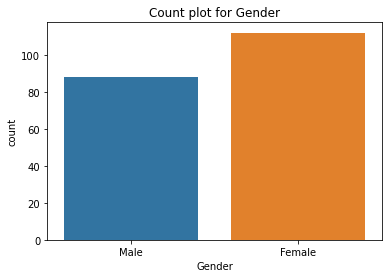

In [3]:

# count plot on single categorical variable
sns.countplot(x ='Gender', data = df)

plt.title("Count plot for Gender")

# Show the plot
plt.show()

In [4]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

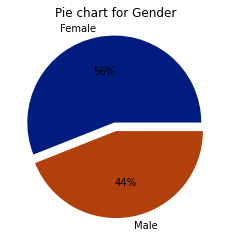

In [5]:

# Creating dataset
keys = ['Female', 'Male']
 
data = [112,88]

#declairing exploding pie
explode = [0.1,0]

#Define seaborn color pallet to use
palette_color = sns.color_palette("dark")

# Creating plot
plt.pie(data, labels = keys, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.title("Pie chart for Gender")
 
# show plot
plt.show()

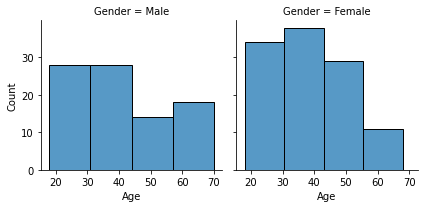

In [6]:
grid = sns.FacetGrid(df, col='Gender')
grid.map(sns.histplot, 'Age', bins=4, kde=False)

#sns.histplot(df['Age'], bins=4, kde=False)

plt.show()

In [7]:
sns.__version__

'0.11.2'

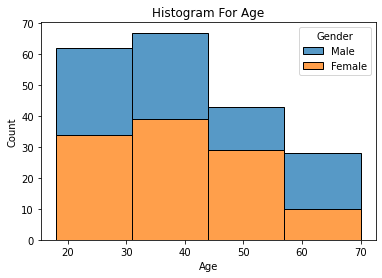

In [8]:
sns.histplot(data = df,
            x = "Age",
            bins = 4,
            hue='Gender',
            multiple = 'stack',
            kde = False)
plt.title("Histogram For Age")
plt.show()

In [9]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

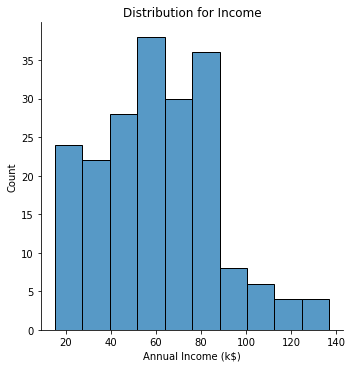

In [14]:
sns.displot(df, x='Annual Income (k$)')
plt.title("Distribution for Income")
plt.show()

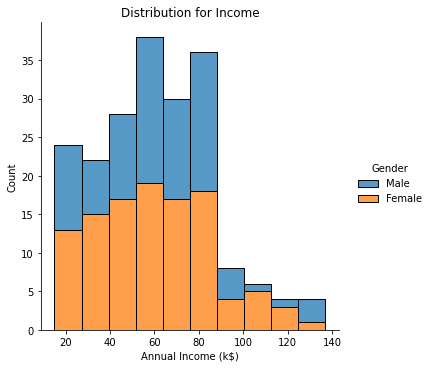

In [15]:
sns.displot(df, x='Annual Income (k$)', hue = "Gender", multiple = "stack")
plt.title("Distribution for Income")
plt.show()

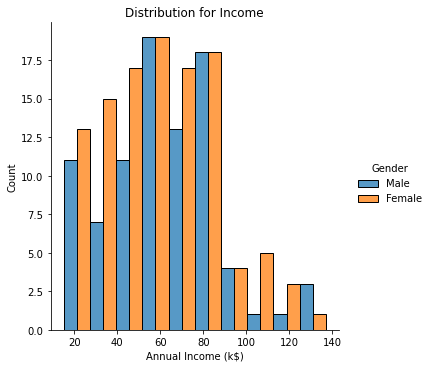

In [16]:
sns.displot(df, x='Annual Income (k$)', hue = "Gender", multiple = "dodge")
plt.title("Distribution for Income")
plt.show()

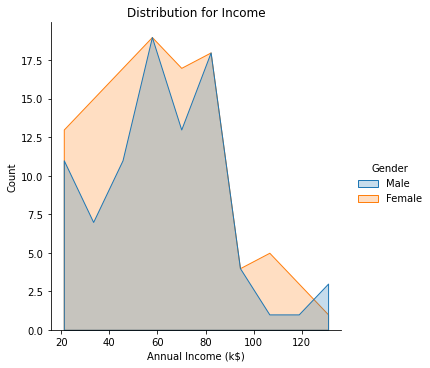

In [25]:
sns.displot(df, x='Annual Income (k$)', hue = "Gender", element = "poly")
plt.title("Distribution for Income")
plt.show()

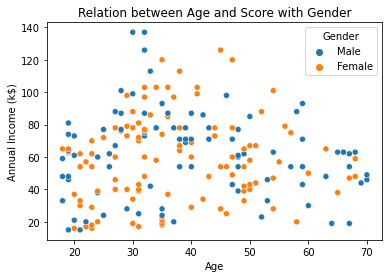

In [24]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue = 'Gender')
plt.title("Relation between Age and Score with Gender")
plt.show()

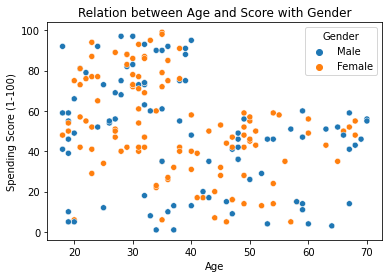

In [22]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue = 'Gender')
plt.title("Relation between Age and Score with Gender")
plt.show()

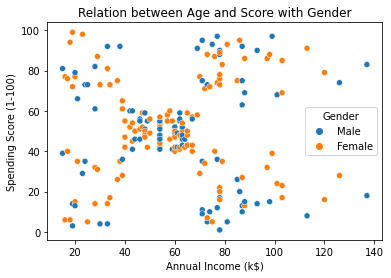

In [26]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue = 'Gender')
plt.title("Relation between Age and Score with Gender")
plt.show()

## Step 4: Data Preprocessing

In [27]:
print (df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [28]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


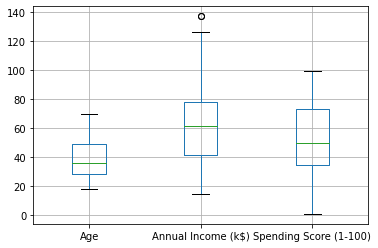

In [29]:
df.boxplot()
plt.show()

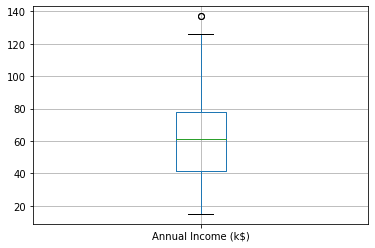

In [32]:
df.boxplot('Annual Income (k$)')
plt.show()

In [34]:
X = df.iloc[: , 2:4 ] #[ start_row : stop_row , start_col: stop_col ]
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [56]:
%%time

#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX = 15

wsse = [] #same as WCSS within cluster sum of squares

# progress bar
with tqdm(total = K_MAX-1) as pbar:
    for i in range(1, K_MAX):
        
        kmeans = KMeans(n_clusters = i, random_state = 10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)

  0%|          | 0/14 [00:00<?, ?it/s]

CPU times: total: 2.39 s
Wall time: 1.47 s


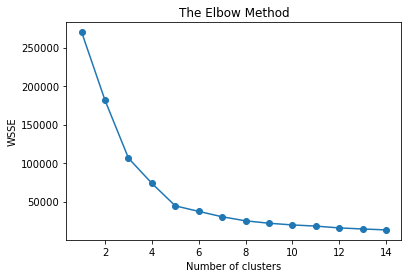

In [57]:
plt.plot(range(1,K_MAX), wsse)
plt.scatter(range(1,K_MAX), wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSSE")
plt.show()

In [52]:
print(wsse[4])

44448.45544793371


In [58]:
# Fitting K-means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [59]:
kmeans.n_iter_

5

In [60]:
df["Clusters"] = Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


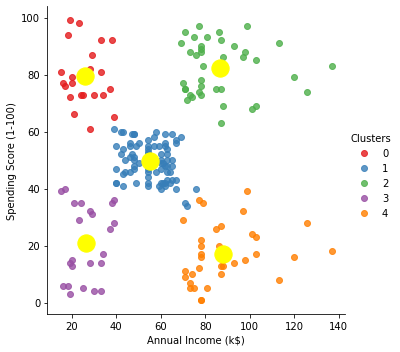

In [62]:
sns.lmplot(data=df,
          x='Annual Income (k$)',
          y='Spending Score (1-100)',
          fit_reg = False, #No regression Line
          hue = 'Clusters',
          palette = "Set1")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 300, c = 'yellow')
plt.show()

In [64]:
df["clusters"]=df.Clusters.map({0:"Careless",1:"Sensible",2:"Target",3:"NotUseful", 4:"Carful"})

In [65]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,clusters
CustomerID,,,,,,
1,Male,19,15,39,3,NotUseful
2,Male,21,15,81,0,Careless
3,Female,20,16,6,3,NotUseful
4,Female,23,16,77,0,Careless
5,Female,31,17,40,3,NotUseful


In [66]:
df.to_csv(r"TargetCustomers.csv",index=True)